In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os import mkdir, path, getcwd
from osgeo import ogr

KeyboardInterrupt: 

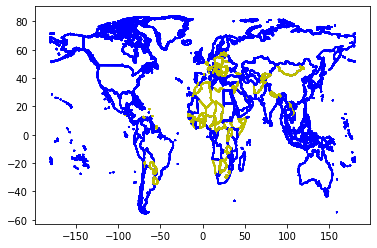

In [26]:
ds = ogr.Open(r'test2/final.shp')



def get_variation_values(ds, period):
    
    var_values = []
    
    for feature in ds.GetLayer(0):
        var_values.append(feature.GetField(period))
        
    var_array = np.array(var_values)
    
    return np.sort(var_array)[::-1]
    
def plot_polygon(poly, symbol = 'k-', **kwargs):
    for i in range(poly.GetGeometryCount()):
        subgeom = poly.GetGeometryRef(i)
        x, y = zip(*subgeom.GetPoints())
        plt.plot(x, y, symbol, **kwargs)
    
def get_geometries(ds, countries, **kwargs):
    for feature in ds.GetLayer(0):
        for i in countries[:20]:
            country = feature.GetField('NAME_EN')
            value = feature.GetField('2010-2011')
            geom = feature.geometry()
            geom_type = geom.GetGeometryType()
            if geom_type == ogr.wkbPolygon:
                plot_polygon(geom, symbol='y', **kwargs)
            elif geom_type == ogr.wkbMultiPolygon:
                for i in range(geom.GetGeometryCount()):
                    subgeom = geom.GetGeometryRef(i)
                    plot_polygon(subgeom, symbol='b', **kwargs)
                
    
get_geometries(ds=ds, countries=get_variation_values(ds=ds, period='2010-2011'))

plt.axis('equal')
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.show()

            